# Logistic Regression: Pima Indian Diabetes
## Portfolio Check 2
### Diondra Stubbs
### 2022 November 14

## What is Logistic Regression?

Logistic regression is a statistical method for predicting binary classes. Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function. It can be useful for deease detection problems in the real world.

The difference between linear regression and logistic regression is that linear regression gives you a continuous output, but logistic regression provides a constant output.

## Pima Indian Diabetes Dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The dataset has 9 columns and 768 rows. The datasets consists of several medical predictor variables and one target variable

### Dataset Features
1. Pregnancies
1. Glucose
1. Blood Pressure
1. Skin Thickness
1. Insulin
1. BMI
1. DiabetesPedigreeFunction
1. Age
1. Outcome

The goal of this analysis is predict whether or not a patient has diabetes, based on the provided diagnostic measurements included in the dataset.

Source: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

## The Process
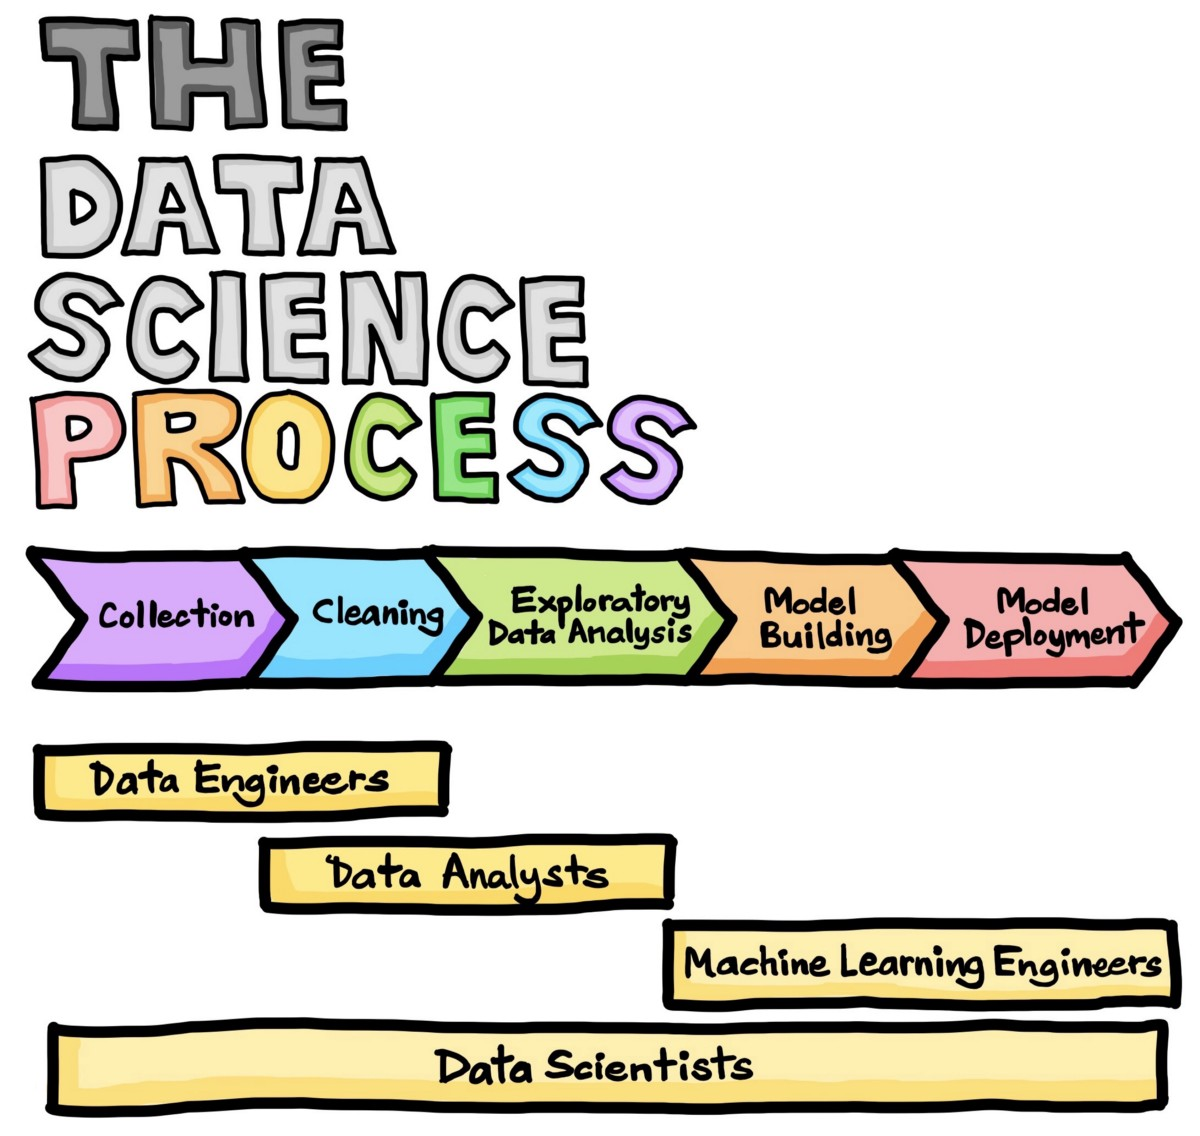

I'm going to follow the data sciene process for this project and describe and define each stage throughout this analysis.

## 1. Collection

My data comes from the National Institute of Diabetes and Digestive and Kidney Diseases. It is in .csv format. Th elink to this dataset is above.

### Loading in Data

In [2]:
# imports
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
# loading in the data
diabetes_url = 'https://raw.githubusercontent.com/rhodyprog4ds/portfolio-stubbsdiondra-1/main/check_2/diabetes.csv?token=GHSAT0AAAAAAB3L5S7D2OKUMYX246R5SYOAY34FRLA'
diabetes_df = pd.read_csv(diabetes_url)

In [4]:
diabetes_df

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 2. Cleaning

The cleaning stage of the data science process involves eliminating duplicate and null values, corrupt data, inconsistent data types, invalid entries, missing data, and improper formatting.

I'm going to check if this data set needs to be cleaned.

### Are there any nulls?

In [5]:
diabetes_df.isnull().values.any()

False

### Are there any duplicates?

In [6]:
#find duplicate rows across all columns
duplicates = diabetes_df[diabetes_df.duplicated()]
duplicates

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


### Are there any inconsistent data types?

In [7]:
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
Blood Pressure                int64
Skin Thickness                int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

I want to rename the DiabetesPedigreeFunction to Pedigree.

In [8]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
diabetes_df.rename(columns={'DiabetesPedigreeFunction':'Pedigree'}, inplace = True)

In [10]:
diabetes_df.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 3. Exploratory Data Analysis (EDA)

Exploratory data analysis (EDA) is used to analyze and investigate data sets and summarize their main characteristics, often using data visualization methods.

I'm going to print some basic descriptive stats, check the info of the dataset and look at the correlations betwen the features in this dataset.

In [11]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pregnancies     768 non-null    int64  
 1   Glucose         768 non-null    int64  
 2   Blood Pressure  768 non-null    int64  
 3   Skin Thickness  768 non-null    int64  
 4   Insulin         768 non-null    int64  
 5   BMI             768 non-null    float64
 6   Pedigree        768 non-null    float64
 7   Age             768 non-null    int64  
 8   Outcome         768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
diabetes_df.describe()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
diabetes_df.corr()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Pedigree,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Blood Pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Skin Thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


I want to look at the correlations to see which features would best predict the Outcome of one having diabetes or not.

The following heatmap shows that Blood Pressure and Skin Thickness are not good contributioms to predicting the Outcome.

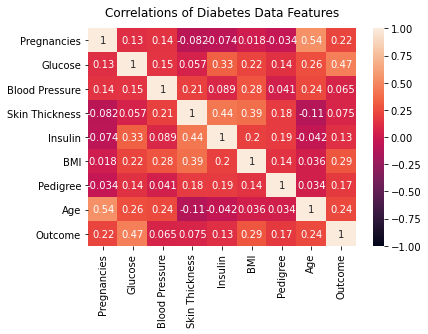

In [14]:
heatmap = sns.heatmap(diabetes_df.corr(),vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlations of Diabetes Data Features', fontdict={'fontsize':12}, pad=12);

## 4. Model Building and Deployment

The modeling stages of the data science process is where we model the data. Model deployment is the process of putting machine learning models into production. Thses stages are where you can use machine learning, statistical models, and algorithms to extract high-value insights and predictions. 

The task is to predict the outcome of one having diabetes given the other medical predictor variables. I want 'Outcome' to be my target variable and the rest of the features to be my predictor variables. I am going to perform a supervised type of machine learning in the form of logistic regression.

In [15]:
feature_vars = diabetes_df.drop(columns='Outcome')
target_var = diabetes_df['Outcome']

### Logistic Regression

First I'm splitting the dataset into two parts where 75%  of the data will be used for model training and 25% for model testing.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(feature_vars, target_var, test_size=0.25,random_state=0)

Now I am going to create a Logistic Regression classifier object using the LogisticRegression() function and fit my model on the trin set using fit().

I am setting a limit for iterations to avoid an error.

In [17]:
log_reg = LogisticRegression(max_iter=1000)

# fit the model with data
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred.shape

(192,)

In [18]:
X_train.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Pedigree,Age
762,9,89,62,0,0,22.5,0.142,33
127,1,118,58,36,94,33.3,0.261,23
564,0,91,80,0,0,32.4,0.601,27
375,12,140,82,43,325,39.2,0.528,58
663,9,145,80,46,130,37.9,0.637,40


In [19]:
X_train.shape, diabetes_df.shape

((576, 8), (768, 9))

In [20]:
576/768

0.75

We have 75% of the samples in the training set

### How did our model do?

First I want to measure the accuracy score

In [21]:
log_reg.score(X_test,y_test)

0.796875

In [22]:
score = accuracy_score(y_test,y_pred)
score

0.796875

Our accuracy is ~80%. The model performed good with 80% accuracy. This model correctly classified 80% of the samples in the test dataset.

Now I want to create a confusion matrix to describe the performance of this model on the test data.

In [25]:
X_test.shape

(192, 8)

In [23]:
con_matrix = metrics.confusion_matrix(y_test, y_pred)
con_matrix

array([[117,  13],
       [ 26,  36]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.796875')

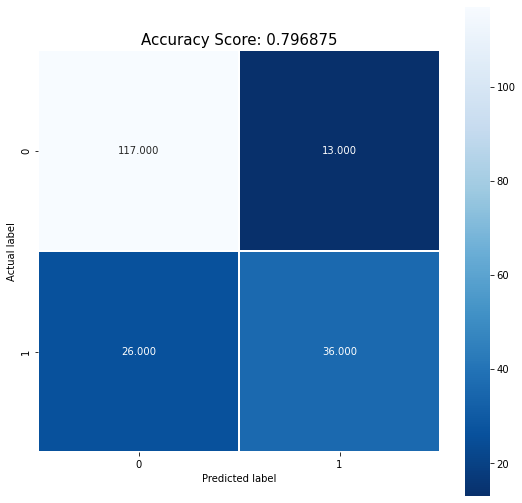

In [24]:
plt.figure(figsize=(9,9))
sns.heatmap(con_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

The dimension of this matrix is 2*2 because this model is binary classification. The classes of the Outcome variable are 0 and 1.

Diagonal values show the accurate predictions, while non-diagonals show inaccurate predictions. In the output, 117 and 36 are actual predictions, and there are 26 and 13 incorrect predictions. This modely correctly classified 153/172 (80.69%) samples and misclassified 36/172 samples (20.9%).

### Classification Report

I want to evaluate the model using classification_report for accuracy.

In [26]:
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.90      0.86       130
   with diabetes       0.73      0.58      0.65        62

        accuracy                           0.80       192
       macro avg       0.78      0.74      0.75       192
    weighted avg       0.79      0.80      0.79       192



Our classification rate is -%, which is considered as good accuracy.

In [31]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(feature_vars, target_var, test_size=0.10,random_state=0)

In [32]:
X_train1.shape, diabetes_df.shape

((691, 8), (768, 9))

In [33]:
(76/768)*100

9.895833333333332

We have ~10% of the samples in the training set

In [34]:
log_reg.score(X_test1,y_test1)

0.8571428571428571

Increasing the train size improves the accuracy.